In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.diagnosis.value_counts()
# Diagnosis column will be predicted

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
Diagnosis=data[["diagnosis"]]

In [6]:
data["diagnosis"].replace({"M":0,"B":1},inplace=True)

In [7]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

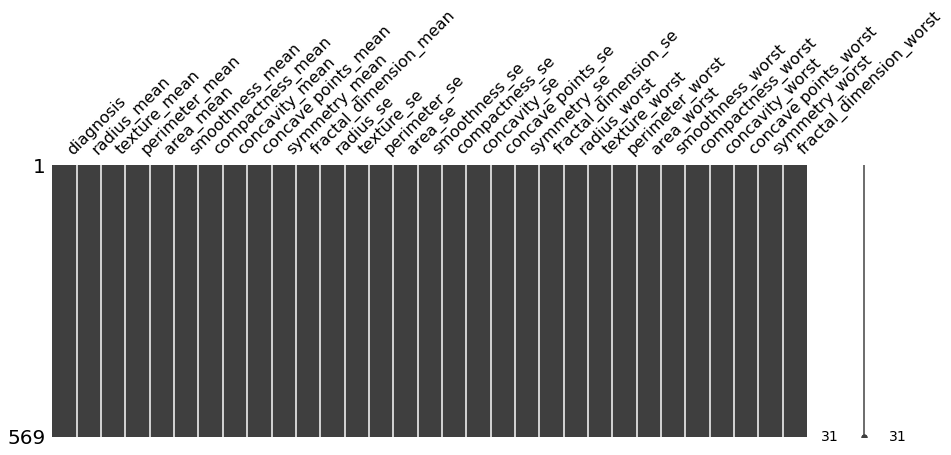

In [9]:
# Check the missing values
msno.matrix(data, figsize=(15,5));
# No Null values

# EDA

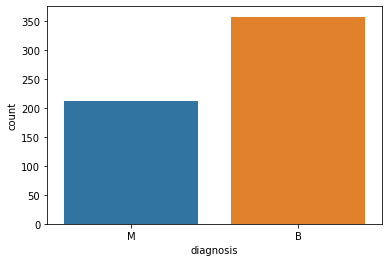

In [10]:

sns.countplot(Diagnosis["diagnosis"])
plt.show()

<AxesSubplot:ylabel='diagnosis'>

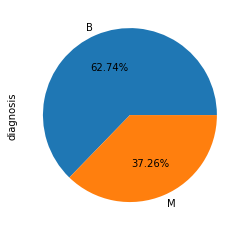

In [11]:
Diagnosis["diagnosis"].value_counts().plot.pie(autopct="%.2f%%")

In [12]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [13]:
num_cols=data._get_numeric_data().columns
num_cols

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

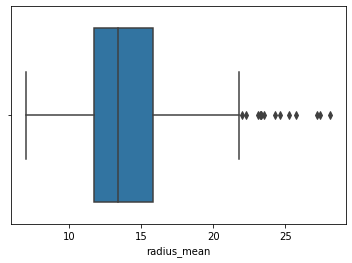

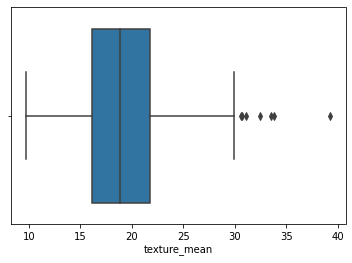

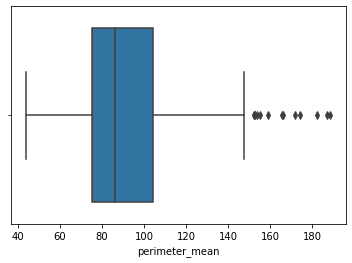

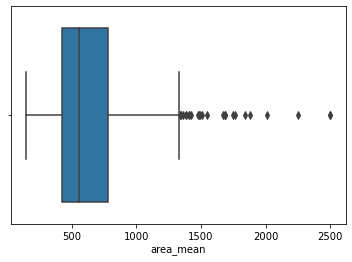

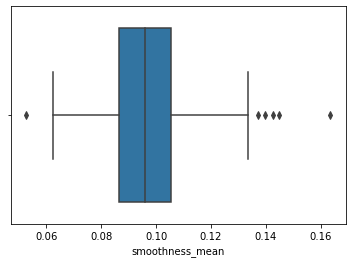

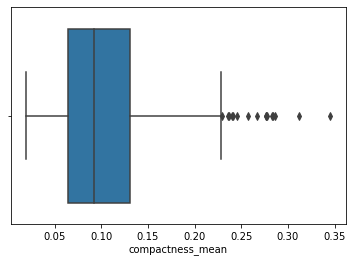

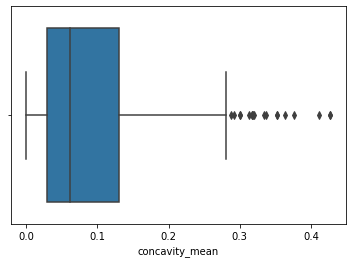

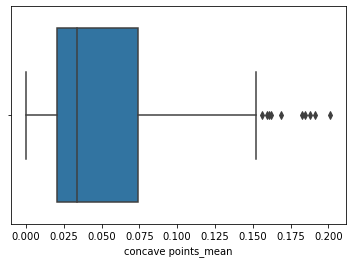

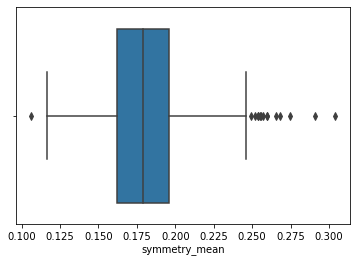

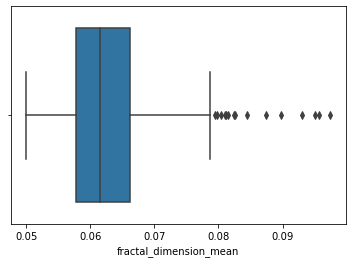

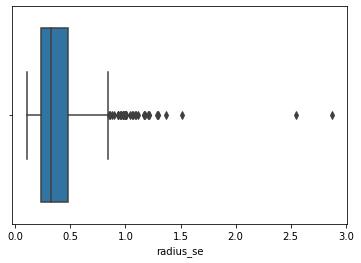

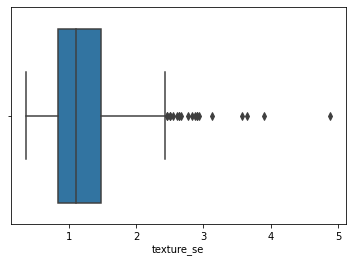

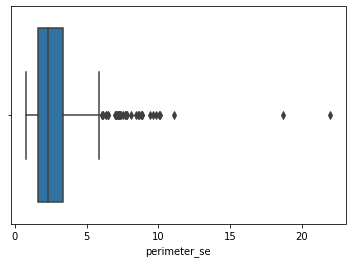

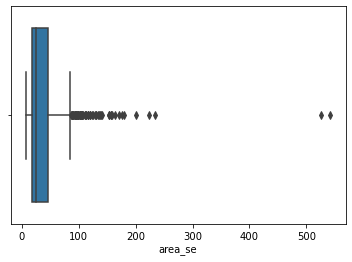

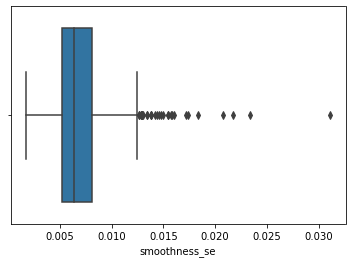

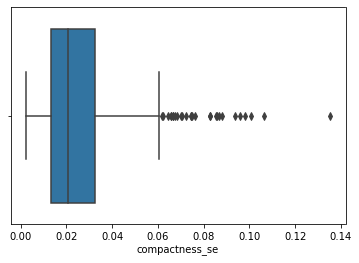

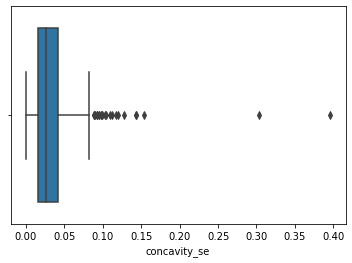

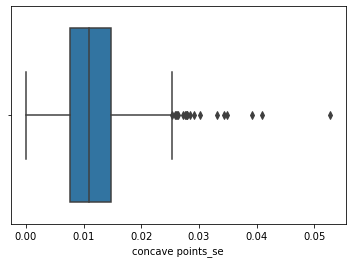

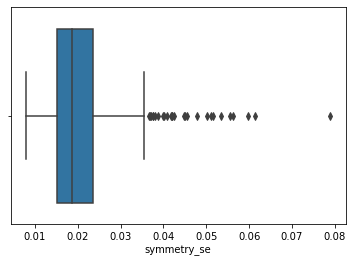

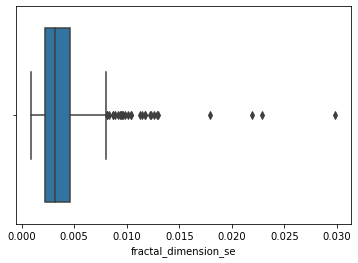

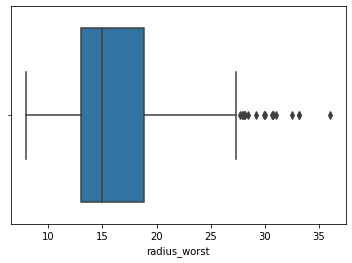

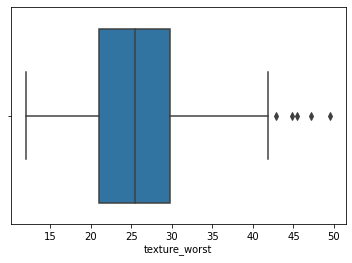

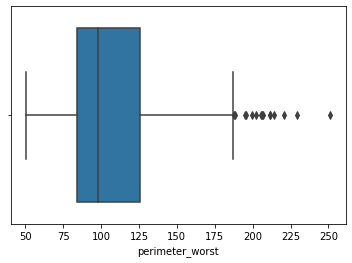

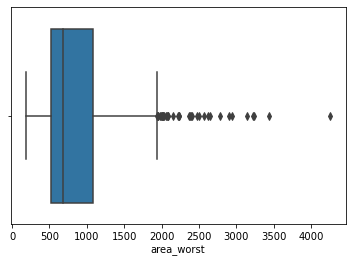

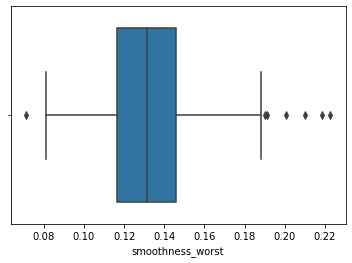

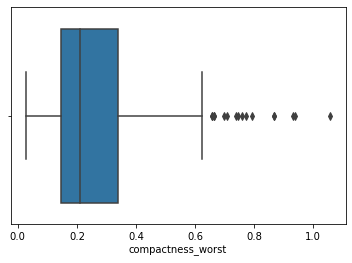

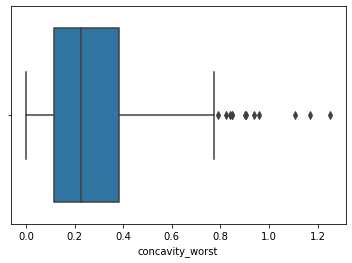

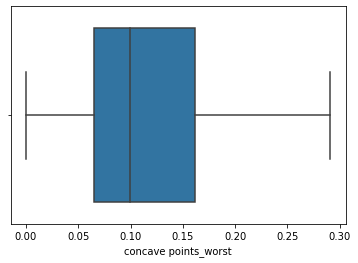

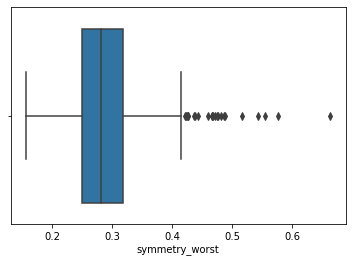

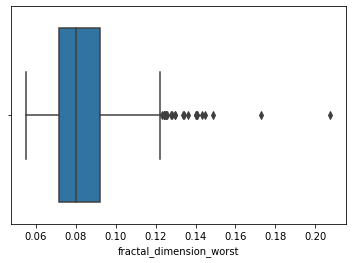

In [14]:
# Looking for outliers
for col in num_cols[1:]:
    sns.boxplot(data[col])
    plt.show()

In [15]:
# Correlation dataframe of df
corr=data.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [16]:
# Correlation dataframe of df where correlation is higher than 0.5 (for Diagnosis)
corr=corr[abs(corr['diagnosis'])>0.7]

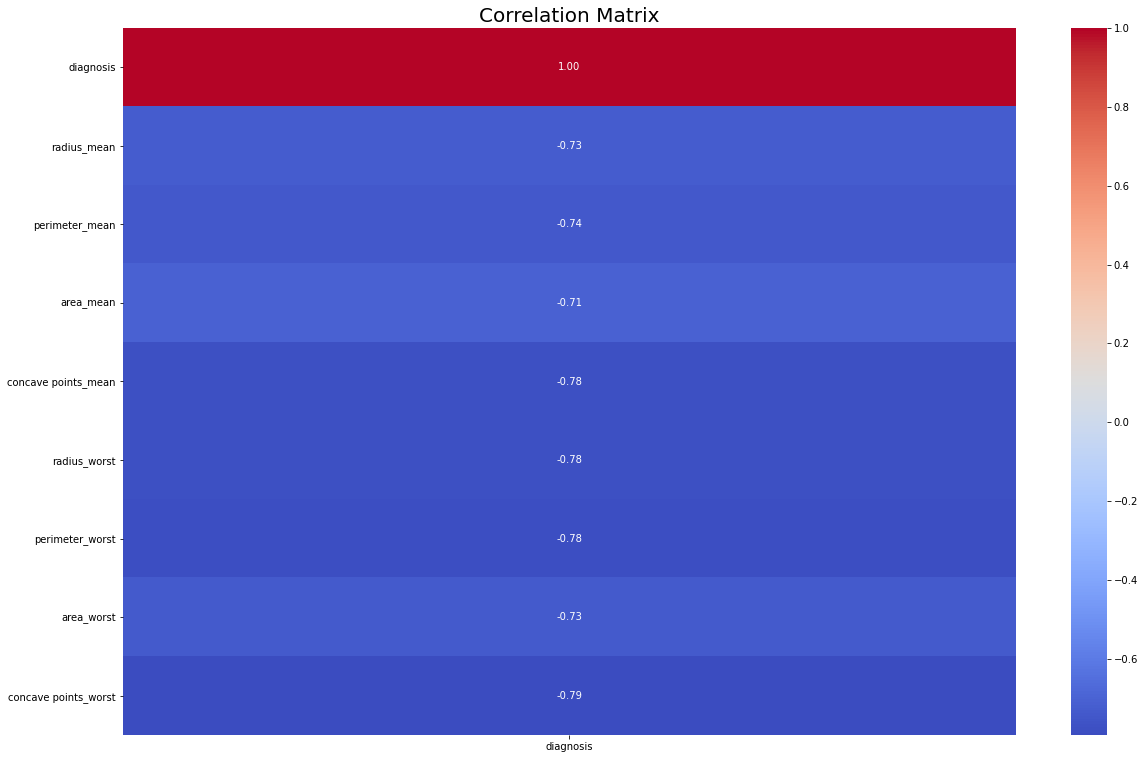

In [17]:
# Correlation matrix of highest corr_rate for Diagnosis
f, ax = plt.subplots(figsize= [20,13])
sns.heatmap(corr['diagnosis'].to_frame(), annot=True, fmt=".2f", ax=ax, cmap = "coolwarm" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [18]:
high_corr_cols=list(corr['diagnosis'].to_frame().index)[1:]
high_corr_cols

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

# Data Preprocessing

In [19]:
copy=data.copy()

In [20]:
# Method for replacing outliers with thresholds
def outlier(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    df.loc[(df[column]<lower_bound), column]=lower_bound
    df.loc[(df[column]>upper_bound), column]=upper_bound
    return df

In [21]:
# Limiting outliers
for col in num_cols[1:]:
    data=outlier(data,col)

In [22]:
# Limiting outliers second time for better result
for col in num_cols[1:]:
    data=outlier(data,col)

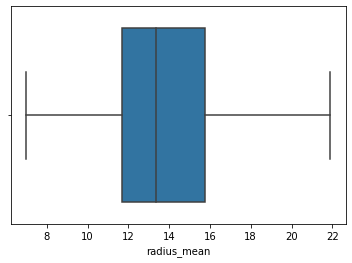

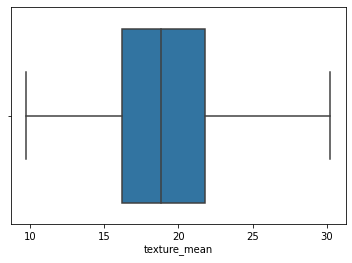

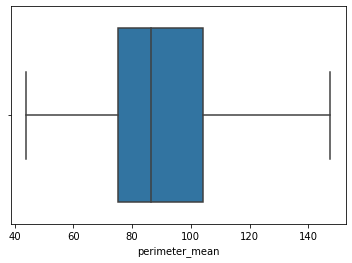

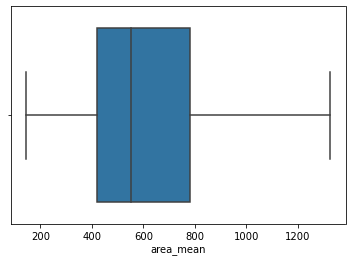

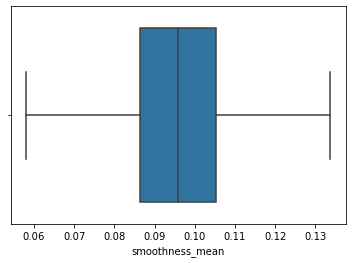

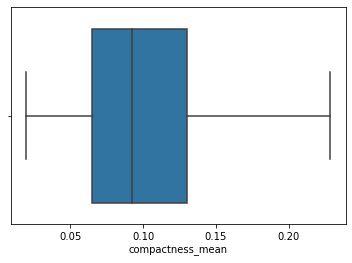

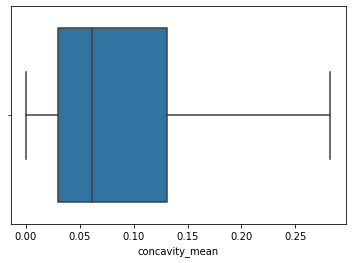

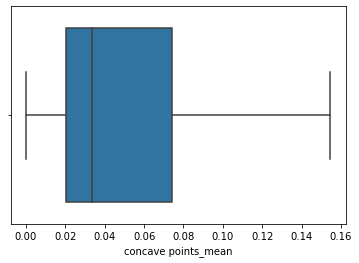

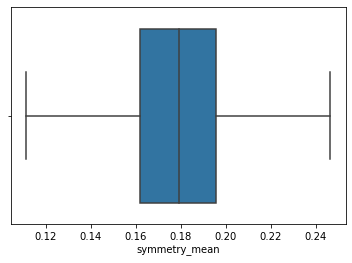

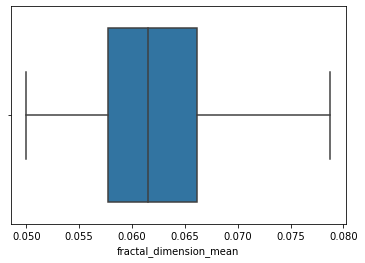

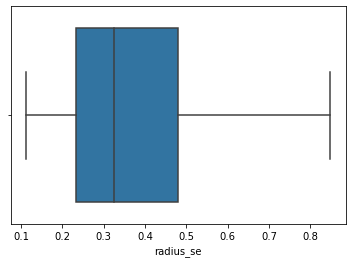

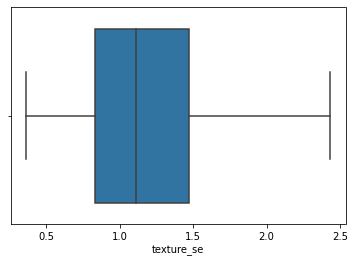

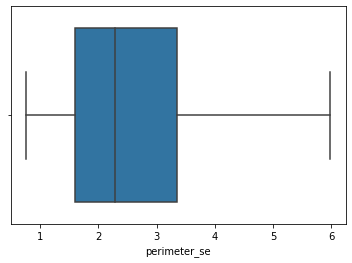

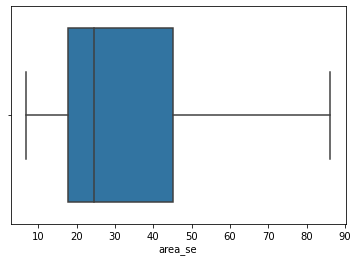

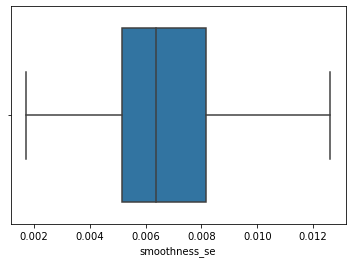

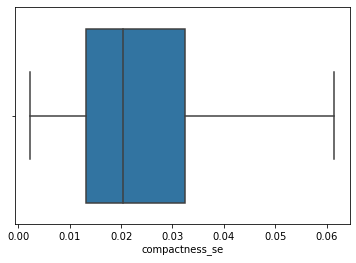

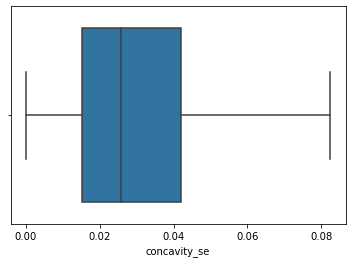

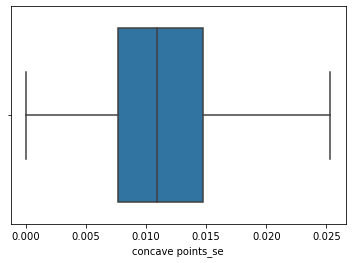

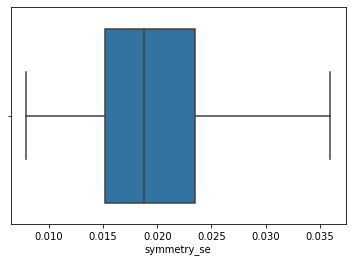

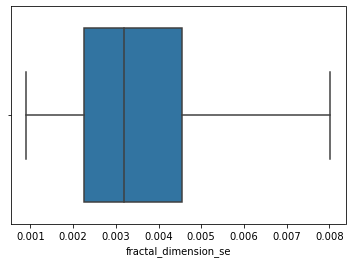

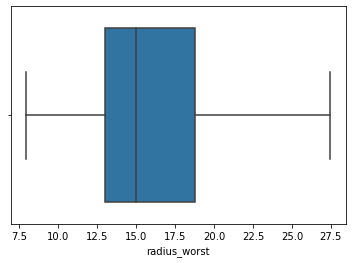

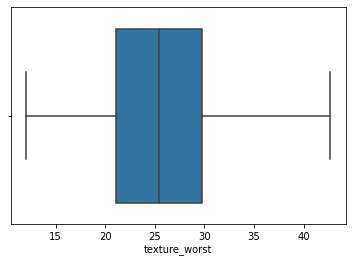

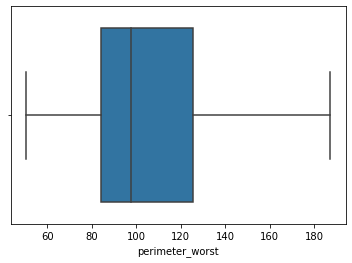

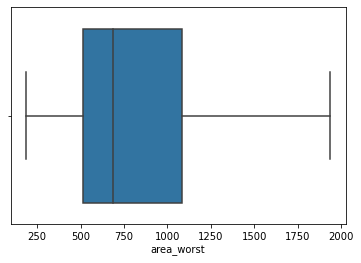

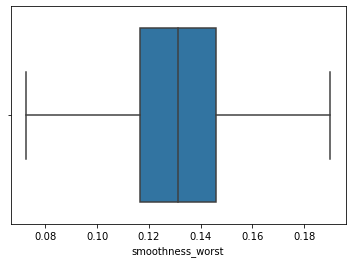

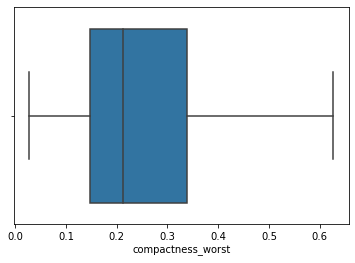

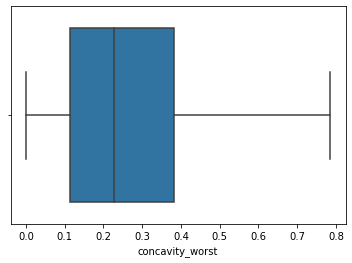

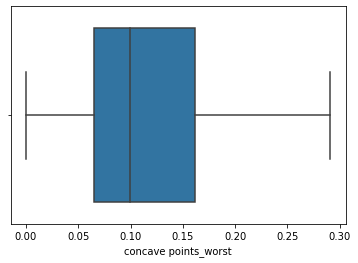

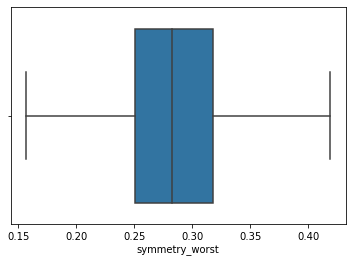

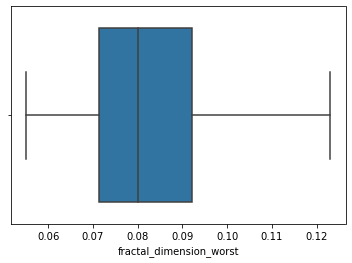

In [23]:
# Limiting outliers 
for col in num_cols[1:]:
    sns.boxplot(data[col])
    plt.show()

In [24]:
# Dropping columns with high correlation
data.drop(high_corr_cols,axis=1,inplace=True)

# Modeling

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from lightgbm import LGBMRegressor
import re
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [26]:
# Method for classification models
def class_model(df, Y, algo, test_size=0.20):
    X=df.drop(Y, axis=1)
    Y=df[[Y]]
    
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=test_size, random_state=42)
    model=algo.fit(X_train, Y_train)
    Y_train_pred=model.predict(X_train)

    print(type(model).__name__)
    Y_test_pred=model.predict(X_test)
    test_acc=accuracy_score(Y_test, Y_test_pred)
    print("Test Score: {}".format(test_acc))
    print('###################################')
    return (type(model).__name__, test_acc)


In [27]:
X=data.drop("diagnosis",axis=1)
Y=data[['diagnosis']]

In [28]:
models=[KNeighborsClassifier(),
        RandomForestClassifier(),
        svm.SVC(gamma="scale"),
        DecisionTreeClassifier(),
        LogisticRegression(),
        GaussianNB(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        XGBClassifier(),
        svm.LinearSVC()]
results={ 'model':[], 'test_score':[]}

In [29]:
for m in models:
    res=class_model(data,"diagnosis",m)
    results["model"].append(res[0])
    results["test_score"].append(res[1])

KNeighborsClassifier
Test Score: 0.9210526315789473
###################################
RandomForestClassifier
Test Score: 0.9736842105263158
###################################
SVC
Test Score: 0.9210526315789473
###################################
DecisionTreeClassifier
Test Score: 0.8947368421052632
###################################
LogisticRegression
Test Score: 0.956140350877193
###################################
GaussianNB
Test Score: 0.9298245614035088
###################################
AdaBoostClassifier
Test Score: 0.9649122807017544
###################################
GradientBoostingClassifier
Test Score: 0.956140350877193
###################################
[17:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassi

In [30]:
# Results of models without tuning
results=pd.DataFrame(results)
results

,model,test_score
0,KNeighborsClassifier,0.921053
1,RandomForestClassifier,0.973684
2,SVC,0.921053
3,DecisionTreeClassifier,0.894737
4,LogisticRegression,0.956140
5,GaussianNB,0.929825
6,AdaBoostClassifier,0.964912
7,GradientBoostingClassifier,0.956140
8,XGBClassifier,0.938596
9,LinearSVC,0.947368


In [31]:
results.to_csv("processed_data.modeling.csv")

In [32]:
# TUNING MODELS

In [33]:
# Hyperparameters of models
model_parameters={
    "KNN":{
        'model':KNeighborsClassifier(),
        'params':{'n_neighbors':list(range(3,11)),
                  'weights': ['uniform', 'distance'],
                 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'leaf_size' : list(range(1,5))}},
    'Bayes':{
        'model':GaussianNB(),
        'params':{}},
    'Support Vector Machine': {
        'model': svm.SVC(gamma='scale'),
        'params': {'C': list(range(0,10))+ [0.1,0.5,0.001,0.0001],
                   'kernel': ['rbf','linear', 'poly']}},
    'Logistic Regression' : {
        'model': LogisticRegression(),
        'params': {'C': list(range(1,40)),
                   'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                    'solver': ['saga', 'newton-cg', 'liblinear'],
                   'fit_intercept': [True, False]}},
    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': list(range(10,30,5)),
                   'verbose': [0, 1],
                   'criterion': ['gini', 'entropy']}},
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {'criterion': ['gini','entropy'],
                  'splitter': ['best', 'random']}}, 
    'Ada Boost Classifier': {
        'model': AdaBoostClassifier(), 
        'params': {'n_estimators': list(range(40,60)), 
                   'algorithm': ['SAMME', 'SAMME.R']}},
    'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(), 
        'params': {'learning_rate': [0.1, 0.2, 0.3, 0.01],
                   'n_estimators': list(range(95, 102)), 
                   'criterion': ['friedman_mse', 'mse', 'mae']}},
    'XGBoost Classifier': {
        'model': XGBClassifier(verbosity = 0),
        'params': {'gamma': list(range(0, 3)), 
                   'max_depth': list(range(1, 10)),
                   'eta': [0,1, 0.3, 0.5, 0.7, 1]}},
}

In [34]:
# Method for performance report
def performance(model_name, acc_score, prec_score, rec_score, auc_roc_score):
    print(model_name,end="::")
    print(f'Accuracy score: {acc_score}')
    print(f'Precision score: {prec_score}')
    print(f'Recall score: {rec_score}')
    print(f'Aoc Roc score: {auc_roc_score}')
    print('---------------------------------------')

In [35]:
# Method for tuning with GridSearchCV
def classification_models(df,Y, model_params):
    X=df.drop(Y,axis=1)
    Y=df[[Y]]
    
    results=[]
    index=0
    for model_name, mp in model_params.items():
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33, stratify=Y)
        
        clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)        
        clf.fit(X_train, Y_train)
        Y_train_pred=clf.predict(X_test)
        acc_score=np.round(accuracy_score(Y_train_pred, Y_test), 4)
        prec_score=np.round(precision_score(Y_train_pred, Y_test), 4)
        rec_score=np.round(recall_score(Y_train_pred, Y_test), 4)
        auc_roc_score=np.round(roc_auc_score(Y_train_pred, Y_test), 4)
        results.append({'model': model_name, 
                        'accuracy_score': acc_score,
                        'precision_score': prec_score,
                        'recall_score': rec_score,
                        'auc_roc_score': auc_roc_score,
                        'best_score': clf.best_score_,
                        'best_params': clf.best_params_})
        performance(model_name, acc_score, prec_score, rec_score, auc_roc_score)
        index+=1
    return results

In [36]:
results_tuned=classification_models(data,"diagnosis",model_parameters)

KNN::Accuracy score: 0.9474
Precision score: 0.9583
Recall score: 0.9583
Aoc Roc score: 0.9435
---------------------------------------
Bayes::Accuracy score: 0.8947
Precision score: 0.8889
Recall score: 0.9412
Aoc Roc score: 0.8836
---------------------------------------
Support Vector Machine::Accuracy score: 0.9386
Precision score: 0.9583
Recall score: 0.9452
Aoc Roc score: 0.936
---------------------------------------
Logistic Regression::Accuracy score: 0.9474
Precision score: 0.9583
Recall score: 0.9583
Aoc Roc score: 0.9435
---------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Random Forest Classifier::Accuracy score: 0.9649
Precision score: 0.9861
Recall score: 0.9595
Aoc Roc score: 0.9672
---------------------------------------
Decision Tree Classifier::Accuracy score: 0.9035
Precision score: 0.9028
Recall score: 0.942
Aoc Roc score: 0.8932
---------------------------------------
Ada Boost Classifier::Accuracy score: 0.9649
Precision score: 0.9861
Recall score: 0.9595
Aoc Roc score: 0.9672
---------------------------------------
Gradient Boosting Classifier::Accuracy score: 0.9561
Precision score: 0.9722
Recall score: 0.9589
Aoc Roc score: 0.9551
---------------------------------------
XGBoost Classifier::Accuracy score: 0.9474
Precision score: 0.9722
Recall score: 0.9459
Aoc Roc score: 0.948
---------------------------------------


In [37]:
# Results of tuned models
results_tuned=pd.DataFrame(results_tuned)
results_tuned

,model,accuracy_score,precision_score,recall_score,auc_roc_score,best_score,best_params
0,KNN,0.9474,0.9583,0.9583,0.9435,0.885714,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh..."
1,Bayes,0.8947,0.8889,0.9412,0.8836,0.901099,{}
2,Support Vector Machine,0.9386,0.9583,0.9452,0.9360,0.958242,"{'C': 3, 'kernel': 'linear'}"
3,Logistic Regression,0.9474,0.9583,0.9583,0.9435,0.962637,"{'C': 12, 'fit_intercept': True, 'penalty': 'l..."
4,Random Forest Classifier,0.9649,0.9861,0.9595,0.9672,0.940659,"{'criterion': 'gini', 'n_estimators': 25, 'ver..."
5,Decision Tree Classifier,0.9035,0.9028,0.9420,0.8932,0.907692,"{'criterion': 'entropy', 'splitter': 'best'}"
6,Ada Boost Classifier,0.9649,0.9861,0.9595,0.9672,0.967033,"{'algorithm': 'SAMME', 'n_estimators': 58}"
7,Gradient Boosting Classifier,0.9561,0.9722,0.9589,0.9551,0.953846,"{'criterion': 'friedman_mse', 'learning_rate':..."
8,XGBoost Classifier,0.9474,0.9722,0.9459,0.9480,0.967033,"{'eta': 0.3, 'gamma': 1, 'max_depth': 1}"


In [38]:
results_tuned.to_csv("processed_data_model_tuning.csv")

# PCA

In [39]:
from sklearn.decomposition import PCA

In [40]:
# Model for PCA transform of data 
def pca_data_transform(data,Y_col,n_comp):
    Y = data[Y_col]
    X = data.drop([Y_col],axis=1)
    
    name=data.name
    
    # PCA needs scaled data
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(X)

    # Build PCA
    pca = PCA(n_components = n_comp)
    pca.fit(x_scaled)
    X_reduced_pca = pca.transform(x_scaled)
    
    pca_data = pd.DataFrame(X_reduced_pca)
    
    pca_data[Y_col] = Y

    return pca_data

In [41]:
# Reading default dataset
pca_default=pd.read_csv("data.csv")
pca_default.drop(["Unnamed: 32","id"],axis=1,inplace=True)
# 
pca_default["diagnosis"] = [1 if item == "M" else 0  for item in pca_default["diagnosis"]]

pca_processed=data.copy()

copy=data.copy()

In [42]:
pca_processed.name="pca_processed"
pca_default.name="pca_default"

In [43]:
frames=[pca_default,pca_processed]

In [44]:
# Tuning PCA components
results_pca={"DataFrame":[],"model":[],"test_score":[],"pca_comps":[]}
for n in range(2,6):
    for f in frames:
        for m in models:
            results_pca["DataFrame"].append(f.name)
            
            pca_data=pca_data_transform(f,"diagnosis",n)
            res=class_model(pca_data,"diagnosis",m)
            
            results_pca["model"].append(res[0])
            results_pca["test_score"].append(res[1])
            results_pca["pca_comps"].append(n)

KNeighborsClassifier
Test Score: 0.9649122807017544
###################################
RandomForestClassifier
Test Score: 0.9824561403508771
###################################
SVC
Test Score: 0.956140350877193
###################################
DecisionTreeClassifier
Test Score: 0.9736842105263158
###################################
LogisticRegression
Test Score: 0.9649122807017544
###################################
GaussianNB
Test Score: 0.956140350877193
###################################
AdaBoostClassifier
Test Score: 0.9649122807017544
###################################
GradientBoostingClassifier
Test Score: 0.9824561403508771
###################################
XGBClassifier
Test Score: 0.9736842105263158
###################################
LinearSVC
Test Score: 0.9824561403508771
###################################
KNeighborsClassifier
Test Score: 0.8596491228070176
###################################
RandomForestClassifier
Test Score: 0.8421052631578947
###################

In [45]:
# Results of tuning only PCA
results_pca_tuned=pd.DataFrame(results_pca).sort_values(by='test_score',ascending=False)
results_pca_tuned

,DataFrame,model,test_score,pca_comps
1,pca_default,RandomForestClassifier,0.982456,2
7,pca_default,GradientBoostingClassifier,0.982456,2
20,pca_default,KNeighborsClassifier,0.982456,3
64,pca_default,LogisticRegression,0.982456,5
27,pca_default,GradientBoostingClassifier,0.982456,3
...,...,...,...,...
18,pca_processed,XGBClassifier,0.868421,2
73,pca_processed,DecisionTreeClassifier,0.859649,5
10,pca_processed,KNeighborsClassifier,0.859649,2
11,pca_processed,RandomForestClassifier,0.842105,2


In [46]:
results_pca_tuned.to_csv("pca_tuning.csv")

In [47]:
# Tuning PCA and models at the same time
def pca_classification_models_tuning(df_list,y, model_params,p_comps):
    results=[]
    df_names=[i.name for i in df_list]
    for n in range(2,p_comps+1):
        count=0
        for df in df_list:
            name=df_names[count]
            df=pca_data_transform(df,y,n)
            X=df.drop(y,axis=1)
            Y=df[[y]]
            
            
            index=0
            for model_name, mp in model_params.items():
                X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33, stratify=Y)

                clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)        
                clf.fit(X_train, Y_train)
                Y_train_pred=clf.predict(X_test)
                acc_score=np.round(accuracy_score(Y_train_pred, Y_test), 4)
                prec_score=np.round(precision_score(Y_train_pred, Y_test), 4)
                rec_score=np.round(recall_score(Y_train_pred, Y_test), 4)
                auc_roc_score=np.round(roc_auc_score(Y_train_pred, Y_test), 4)
                results.append({"frame":name,
                                'model': model_name, 
                                "pca_comps":n,
                                'accuracy_score': acc_score,
                                'precision_score': prec_score,
                                'recall_score': rec_score,
                                'auc_roc_score': auc_roc_score,
                                'best_score': clf.best_score_,
                                'best_params': clf.best_params_})
                performance(model_name, acc_score, prec_score, rec_score, auc_roc_score)
                index+=1
            count+=1
    return results

In [48]:
pca_processed.name="pca_processed"
pca_default.name="pca_default"
frames=[pca_processed,pca_default]

In [49]:
results_hypertuned=pca_classification_models_tuning(frames,"diagnosis",model_parameters,5)

KNN::Accuracy score: 0.8684
Precision score: 0.875
Recall score: 0.913
Aoc Roc score: 0.8565
---------------------------------------
Bayes::Accuracy score: 0.8772
Precision score: 0.9028
Recall score: 0.9028
Aoc Roc score: 0.8681
---------------------------------------
Support Vector Machine::Accuracy score: 0.886
Precision score: 0.9306
Recall score: 0.8933
Aoc Roc score: 0.8826
---------------------------------------
Logistic Regression::Accuracy score: 0.886
Precision score: 0.9306
Recall score: 0.8933
Aoc Roc score: 0.8826
---------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


Random Forest Classifier::Accuracy score: 0.8596
Precision score: 0.8472
Recall score: 0.9242
Aoc Roc score: 0.8475
---------------------------------------
Decision Tree Classifier::Accuracy score: 0.8509
Precision score: 0.8194
Recall score: 0.9365
Aoc Roc score: 0.8408
---------------------------------------
Ada Boost Classifier::Accuracy score: 0.8333
Precision score: 0.7778
Recall score: 0.9492
Aoc Roc score: 0.8291
---------------------------------------
Gradient Boosting Classifier::Accuracy score: 0.8509
Precision score: 0.8194
Recall score: 0.9365
Aoc Roc score: 0.8408
---------------------------------------
XGBoost Classifier::Accuracy score: 0.8333
Precision score: 0.7778
Recall score: 0.9492
Aoc Roc score: 0.8291
---------------------------------------
KNN::Accuracy score: 0.9123
Precision score: 0.8333
Recall score: 0.9211
Aoc Roc score: 0.9145
---------------------------------------
Bayes::Accuracy score: 0.9123
Precision score: 0.7857
Recall score: 0.9706
Aoc Roc score: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Random Forest Classifier::Accuracy score: 0.9123
Precision score: 0.8333
Recall score: 0.9211
Aoc Roc score: 0.9145
---------------------------------------
Decision Tree Classifier::Accuracy score: 0.8947
Precision score: 0.8333
Recall score: 0.875
Aoc Roc score: 0.8902
---------------------------------------
Ada Boost Classifier::Accuracy score: 0.9298
Precision score: 0.881
Recall score: 0.925
Aoc Roc score: 0.9287
---------------------------------------
Gradient Boosting Classifier::Accuracy score: 0.9123
Precision score: 0.8333
Recall score: 0.9211
Aoc Roc score: 0.9145
---------------------------------------
XGBoost Classifier::Accuracy score: 0.9211
Precision score: 0.881
Recall score: 0.9024
Aoc Roc score: 0.917
---------------------------------------
KNN::Accuracy score: 0.9561
Precision score: 0.9444
Recall score: 0.9855
Aoc Roc score: 0.9483
---------------------------------------
Bayes::Accuracy score: 0.9211
Precision score: 0.9306
Recall score: 0.9437
Aoc Roc score: 0.9137

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Random Forest Classifier::Accuracy score: 0.8947
Precision score: 0.875
Recall score: 0.9545
Aoc Roc score: 0.8835
---------------------------------------
Decision Tree Classifier::Accuracy score: 0.8684
Precision score: 0.8472
Recall score: 0.9385
Aoc Roc score: 0.857
---------------------------------------
Ada Boost Classifier::Accuracy score: 0.9211
Precision score: 0.8889
Recall score: 0.9846
Aoc Roc score: 0.9107
---------------------------------------
Gradient Boosting Classifier::Accuracy score: 0.9211
Precision score: 0.8889
Recall score: 0.9846
Aoc Roc score: 0.9107
---------------------------------------
XGBoost Classifier::Accuracy score: 0.9211
Precision score: 0.8889
Recall score: 0.9846
Aoc Roc score: 0.9107
---------------------------------------
KNN::Accuracy score: 0.9298
Precision score: 0.881
Recall score: 0.925
Aoc Roc score: 0.9287
---------------------------------------
Bayes::Accuracy score: 0.9211
Precision score: 0.8095
Recall score: 0.9714
Aoc Roc score: 0.935

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


Random Forest Classifier::Accuracy score: 0.9211
Precision score: 0.8333
Recall score: 0.9459
Aoc Roc score: 0.9275
---------------------------------------
Decision Tree Classifier::Accuracy score: 0.9035
Precision score: 0.881
Recall score: 0.8605
Aoc Roc score: 0.895
---------------------------------------
Ada Boost Classifier::Accuracy score: 0.9123
Precision score: 0.8571
Recall score: 0.9
Aoc Roc score: 0.9095
---------------------------------------
Gradient Boosting Classifier::Accuracy score: 0.9123
Precision score: 0.8095
Recall score: 0.9444
Aoc Roc score: 0.9209
---------------------------------------
XGBoost Classifier::Accuracy score: 0.9298
Precision score: 0.8571
Recall score: 0.9474
Aoc Roc score: 0.9342
---------------------------------------
KNN::Accuracy score: 0.9386
Precision score: 0.9306
Recall score: 0.971
Aoc Roc score: 0.93
---------------------------------------
Bayes::Accuracy score: 0.9123
Precision score: 0.9167
Recall score: 0.9429
Aoc Roc score: 0.9032
--

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


Random Forest Classifier::Accuracy score: 0.9123
Precision score: 0.875
Recall score: 0.9844
Aoc Roc score: 0.9022
---------------------------------------
Decision Tree Classifier::Accuracy score: 0.886
Precision score: 0.9028
Recall score: 0.9155
Aoc Roc score: 0.8764
---------------------------------------
Ada Boost Classifier::Accuracy score: 0.9298
Precision score: 0.9028
Recall score: 0.9848
Aoc Roc score: 0.9195
---------------------------------------
Gradient Boosting Classifier::Accuracy score: 0.9298
Precision score: 0.9028
Recall score: 0.9848
Aoc Roc score: 0.9195
---------------------------------------
XGBoost Classifier::Accuracy score: 0.9386
Precision score: 0.9167
Recall score: 0.9851
Aoc Roc score: 0.9287
---------------------------------------
KNN::Accuracy score: 0.9211
Precision score: 0.881
Recall score: 0.9024
Aoc Roc score: 0.917
---------------------------------------
Bayes::Accuracy score: 0.9386
Precision score: 0.8571
Recall score: 0.973
Aoc Roc score: 0.9475

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


Random Forest Classifier::Accuracy score: 0.9386
Precision score: 0.881
Recall score: 0.9487
Aoc Roc score: 0.941
---------------------------------------
Decision Tree Classifier::Accuracy score: 0.9386
Precision score: 0.8571
Recall score: 0.973
Aoc Roc score: 0.9475
---------------------------------------
Ada Boost Classifier::Accuracy score: 0.9386
Precision score: 0.8571
Recall score: 0.973
Aoc Roc score: 0.9475
---------------------------------------
Gradient Boosting Classifier::Accuracy score: 0.9386
Precision score: 0.881
Recall score: 0.9487
Aoc Roc score: 0.941
---------------------------------------
XGBoost Classifier::Accuracy score: 0.9386
Precision score: 0.9048
Recall score: 0.9268
Aoc Roc score: 0.936
---------------------------------------
KNN::Accuracy score: 0.9386
Precision score: 0.9306
Recall score: 0.971
Aoc Roc score: 0.93
---------------------------------------
Bayes::Accuracy score: 0.9474
Precision score: 0.9722
Recall score: 0.9459
Aoc Roc score: 0.948
-----

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


Random Forest Classifier::Accuracy score: 0.9386
Precision score: 0.9167
Recall score: 0.9851
Aoc Roc score: 0.9287
---------------------------------------
Decision Tree Classifier::Accuracy score: 0.9035
Precision score: 0.9028
Recall score: 0.942
Aoc Roc score: 0.8932
---------------------------------------
Ada Boost Classifier::Accuracy score: 0.9386
Precision score: 0.9167
Recall score: 0.9851
Aoc Roc score: 0.9287
---------------------------------------
Gradient Boosting Classifier::Accuracy score: 0.9474
Precision score: 0.9306
Recall score: 0.9853
Aoc Roc score: 0.9383
---------------------------------------
XGBoost Classifier::Accuracy score: 0.9386
Precision score: 0.9167
Recall score: 0.9851
Aoc Roc score: 0.9287
---------------------------------------
KNN::Accuracy score: 0.9386
Precision score: 0.9048
Recall score: 0.9268
Aoc Roc score: 0.936
---------------------------------------
Bayes::Accuracy score: 0.9386
Precision score: 0.8571
Recall score: 0.973
Aoc Roc score: 0.94

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


Random Forest Classifier::Accuracy score: 0.9474
Precision score: 0.9048
Recall score: 0.95
Aoc Roc score: 0.948
---------------------------------------
Decision Tree Classifier::Accuracy score: 0.9386
Precision score: 0.881
Recall score: 0.9487
Aoc Roc score: 0.941
---------------------------------------
Ada Boost Classifier::Accuracy score: 0.9561
Precision score: 0.9048
Recall score: 0.9744
Aoc Roc score: 0.9605
---------------------------------------
Gradient Boosting Classifier::Accuracy score: 0.9474
Precision score: 0.9048
Recall score: 0.95
Aoc Roc score: 0.948
---------------------------------------
XGBoost Classifier::Accuracy score: 0.9386
Precision score: 0.9048
Recall score: 0.9268
Aoc Roc score: 0.936
---------------------------------------


In [50]:
results_hypertuned_pca_df=pd.DataFrame(results_hypertuned)

In [51]:
# Results of tuning PCA and models
results_hypertuned_pca_df.sort_values(by=["accuracy_score","precision_score"],ascending=False,inplace=True)
results_hypertuned_pca_df.head(10)

,frame,model,pca_comps,accuracy_score,precision_score,recall_score,auc_roc_score,best_score,best_params
57,pca_processed,Logistic Regression,5,0.9825,0.9861,0.9861,0.9812,0.958242,"{'C': 4, 'fit_intercept': True, 'penalty': 'l2..."
56,pca_processed,Support Vector Machine,5,0.9649,0.9583,0.9857,0.9588,0.960440,"{'C': 9, 'kernel': 'linear'}"
18,pca_processed,KNN,3,0.9561,0.9444,0.9855,0.9483,0.940659,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh..."
38,pca_processed,Support Vector Machine,4,0.9561,0.9444,0.9855,0.9483,0.945055,"{'C': 1, 'kernel': 'linear'}"
39,pca_processed,Logistic Regression,4,0.9561,0.9444,0.9855,0.9483,0.942857,"{'C': 1, 'fit_intercept': True, 'penalty': 'l1..."
69,pca_default,Ada Boost Classifier,5,0.9561,0.9048,0.9744,0.9605,0.975824,"{'algorithm': 'SAMME', 'n_estimators': 40}"
55,pca_processed,Bayes,5,0.9474,0.9722,0.9459,0.9480,0.905495,{}
20,pca_processed,Support Vector Machine,3,0.9474,0.9306,0.9853,0.9383,0.940659,"{'C': 8, 'kernel': 'linear'}"
61,pca_processed,Gradient Boosting Classifier,5,0.9474,0.9306,0.9853,0.9383,0.947253,"{'criterion': 'friedman_mse', 'learning_rate':..."
67,pca_default,Random Forest Classifier,5,0.9474,0.9048,0.9500,0.9480,0.978022,"{'criterion': 'entropy', 'n_estimators': 20, '..."


In [52]:
results_hypertuned_pca_df.to_csv("model_and_pca_tuning.csv")

In [53]:
# Results of KNN model 
results_hypertuned_pca_df[results_hypertuned_pca_df['model']=='KNN']

,frame,model,pca_comps,accuracy_score,precision_score,recall_score,auc_roc_score,best_score,best_params
18,pca_processed,KNN,3,0.9561,0.9444,0.9855,0.9483,0.940659,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh..."
36,pca_processed,KNN,4,0.9386,0.9306,0.9710,0.9300,0.927473,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh..."
54,pca_processed,KNN,5,0.9386,0.9306,0.9710,0.9300,0.945055,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh..."
63,pca_default,KNN,5,0.9386,0.9048,0.9268,0.9360,0.978022,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh..."
27,pca_default,KNN,3,0.9298,0.8810,0.9250,0.9287,0.962637,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh..."
45,pca_default,KNN,4,0.9211,0.8810,0.9024,0.9170,0.967033,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh..."
9,pca_default,KNN,2,0.9123,0.8333,0.9211,0.9145,0.956044,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh..."
0,pca_processed,KNN,2,0.8684,0.8750,0.9130,0.8565,0.861538,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh..."
